## AIM OF THE PROJECT
* This project predicts the business cycle from macroeconomic data. Recession can be predicted from multitude of factors from the macroeconomic indicators. The macroeconomic data was collected from [FRED-MD: A Monthly Database for Macroeconomic Research](https://research.stlouisfed.org/econ/mccracken/fred-databases/). For the business cycle prediction, we used data from [NBER](https://www.nber.org/research/business-cycle-dating). It is a classification problem, where we have to predict whether we are in recession (label 1) or not (label 0) from macroeconomic indicators.
* All the columns are continuos data, except one column MONTH. It is a categorical data ranging from 0-11, where 0 means January and 11 means December. Information about the columns can be found [here](https://research.stlouisfed.org/wp/more/2020-005)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import joblib
%matplotlib inline

In [2]:
macro_df = pd.read_csv("current.csv")
macro_df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [3]:
macro_df.drop([0],axis=0,inplace=True)
macro_df.reset_index(inplace=True,drop=True)
macro_df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,2/1/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,3/1/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,4/1/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,5/1/1959,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [4]:
macro_df['sasdate'] = pd.to_datetime(macro_df['sasdate'])

## SCRAPING DATA FROM NBER FOR BUSINESS CYCLE

In [5]:
import requests

recession_dates_json = requests.get("http://data.nber.org/data/cycles/business_cycle_dates.json")
recession_dates_json.json()

[{'peak': '', 'trough': '1854-12-01'},
 {'peak': '1857-06-01', 'trough': '1858-12-01'},
 {'peak': '1860-10-01', 'trough': '1861-06-01'},
 {'peak': '1865-04-01', 'trough': '1867-12-01'},
 {'peak': '1869-06-01', 'trough': '1870-12-01'},
 {'peak': '1873-10-01', 'trough': '1879-03-01'},
 {'peak': '1882-03-01', 'trough': '1885-05-01'},
 {'peak': '1887-03-01', 'trough': '1888-04-01'},
 {'peak': '1890-07-01', 'trough': '1891-05-01'},
 {'peak': '1893-01-01', 'trough': '1894-06-01'},
 {'peak': '1895-12-01', 'trough': '1897-06-01'},
 {'peak': '1899-06-01', 'trough': '1900-12-01'},
 {'peak': '1902-09-01', 'trough': '1904-08-01'},
 {'peak': '1907-05-01', 'trough': '1908-06-01'},
 {'peak': '1910-01-01', 'trough': '1912-01-01'},
 {'peak': '1913-01-01', 'trough': '1914-12-01'},
 {'peak': '1918-08-01', 'trough': '1919-03-01'},
 {'peak': '1920-01-01', 'trough': '1921-07-01'},
 {'peak': '1923-05-01', 'trough': '1924-07-01'},
 {'peak': '1926-10-01', 'trough': '1927-11-01'},
 {'peak': '1929-08-01', 'troug

In [5]:
recession_df = pd.read_csv('recession_dates.csv')
recession_df.head()

,Date,Regime
0,1/1/1959,0
1,2/1/1959,0
2,3/1/1959,0
3,4/1/1959,0
4,5/1/1959,0


## KEEPING THE LAST TWO YEARS OF DATA FOR FORECASTING AND TO CHECK WHETHER WE WERE IN A RECESSION IN 2022

In [6]:
final_macro_df = macro_df.iloc[-27:]

In [7]:
df = pd.merge(left=macro_df,right=recession_df,left_index=True,how='left',right_index=True)

In [8]:
df.drop(['Date'],axis=1,inplace=True)

In [9]:
for col in df.columns[:-1]:
    if df[col].isna().sum()>10:
        df.drop(col,inplace=True,axis=1)

In [10]:
X_cols = df.columns[:-1]
y_cols = ['Regime']

## FILLING MISSING VALUES
* As this is a time sensitive financial data, we don't want any information leakage from future to the past. Hence we are doing forward fill for each column, which will fill in data from the past to the future missing ones. This will ensure that our data does not leak, and also many macro indicators are stagnant most of times when we go from one month to another, hence it will not change. Hence we can do a forward fill of missing values

In [11]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df[X_cols].ffill(inplace=True)
df.isna().sum()

sasdate             0
RPI                 0
W875RX1             0
DPCERA3M086SBEA     0
CMRMTSPLx           1
                   ..
CES3000000008       0
DTCOLNVHFNM         1
DTCTHFNM            1
INVEST              0
Regime             27
Length: 119, dtype: int64

In [12]:
df[X_cols].isna().sum().sort_values(ascending=False)

S&P PE ratio     2
HWIURATIO        1
CP3Mx            1
DTCTHFNM         1
DTCOLNVHFNM      1
                ..
DMANEMP          0
MANEMP           0
USCONS           0
CES1021000001    0
INVEST           0
Length: 118, dtype: int64

In [13]:
#Dropping rest of the missing data
df.dropna(inplace=True)

In [14]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,Regime
0,1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,...,56.918,17.791,11.326,2.13,2.45,2.04,6476.0,12298.0,84.2043,0.0
1,1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,...,56.951,17.798,11.343,2.14,2.46,2.05,6476.0,12298.0,83.5280,0.0
2,1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,...,57.022,17.785,11.363,2.15,2.45,2.07,6508.0,12349.0,81.6405,0.0
3,1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,...,57.080,17.796,11.403,2.16,2.47,2.08,6620.0,12484.0,81.8099,0.0
4,1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,...,57.175,17.777,11.421,2.17,2.48,2.08,6753.0,12646.0,80.7315,0.0


## UNBALANCED DATASET
* As we can see that 0, which corresponds to expansion period or non-recession period has a higher frequency compared to 1 or recession period data. It is expected as we had less recession periods compared expansion period

## RECALL IS WHAT WE ARE LOOKING FOR
* There is old adage in economics, *If you expect something bad to happen, then it does not happen*. So for our analysis, RECALL is important as it minimizes FN (False Negative). If our model predict that we are in recession, but it turns we are not in recession, then it is a acceptable thing. Because it will help people to cut costs and take measures to avoid recession. But in FP, if we are not in recession and our model predicts that we are in recession, then we may suffer economically. So we will try to avoid FN, hence increase RECALL SCORE

In [15]:
df['Regime'].value_counts()

0.0    641
1.0     99
Name: Regime, dtype: int64

In [16]:
sp500 = pd.read_csv('sp500.csv')
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1959-01-01,55.439999,56.040001,54.889999,55.450001,55.450001,83240000
1,1959-02-01,55.209999,55.520000,53.580002,55.410000,55.410000,65790000
2,1959-03-01,55.730000,56.669998,55.439999,55.439999,55.439999,82430000
3,1959-04-01,55.689999,58.169998,55.689999,57.590000,57.590000,75840000
4,1959-05-01,57.650002,58.680000,56.880001,58.680000,58.680000,70950000


In [17]:
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [18]:
year_vals = sp500['Date'].dt.year.values

year_vals = [str(yv) for yv in year_vals]

## S&P500 prices vs. Business cycle

Text(0.5, 1.0, 'Red parts denote Recession')

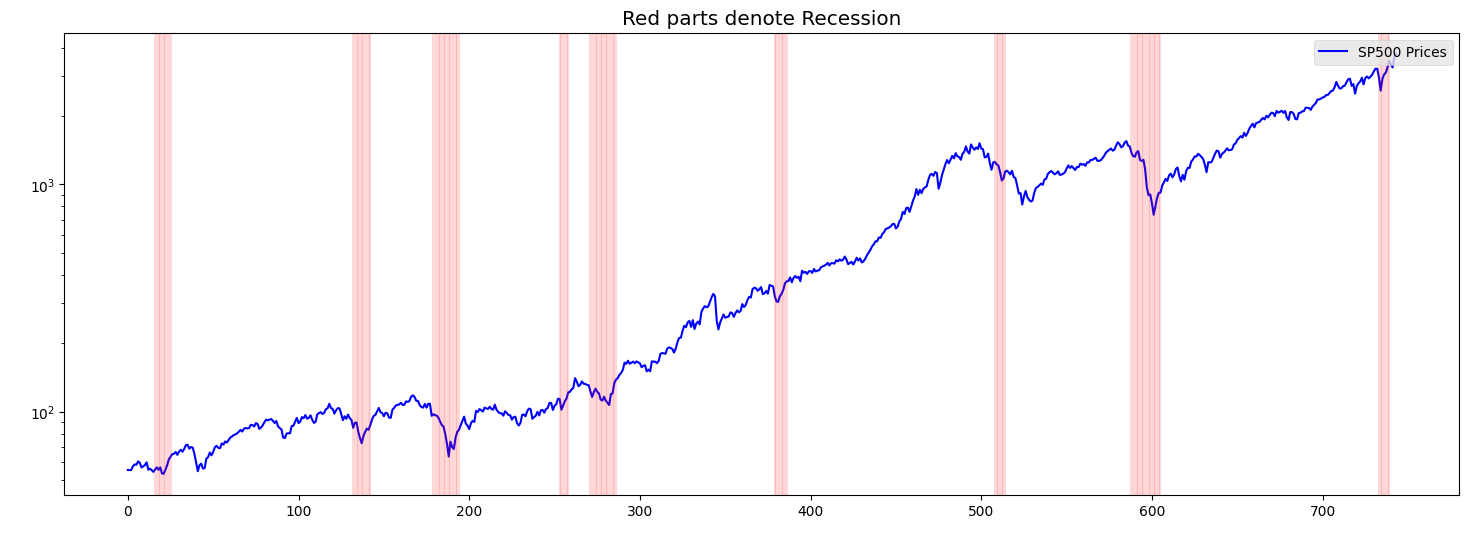

In [19]:
plt.figure(figsize=(18, 6))
plt.xlabel(' ')
plt.ylabel(' ')

regime_dates = sp500['Close']
regime_label = df['Regime'].values
plt.style.use('ggplot')
plt.yscale('log')

plt.plot(regime_dates,label='SP500 Prices',color='blue')

# first,last = False,False
for i in range(len(regime_dates)):
    if i>=len(regime_label):break
    if regime_label[i]==1:
        plt.axvline(x=i,alpha=0.15, color='red') 
    else:pass
plt.legend(loc='upper right')
plt.title("Red parts denote Recession")

## TRAIN TEST SPLIT

In [20]:
X = df[X_cols]
y = df['Regime']

## ADDING A NEW CATEGORICAL FEATURE MONTH

In [21]:
X['MONTH'] = X['sasdate'].dt.month
X.drop(['sasdate'],axis=1,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, stratify=y,random_state=42,shuffle=True)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=100, stratify=y_train,random_state=42,shuffle=True)

In [31]:
import wandb 
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: athe_kunal (rf_project). Use `wandb login --relogin` to force relogin


True

## THE TEST AND TRAIN DATA HAVE SIMILAR PROPORTION OF DATA

In [24]:
y_train.value_counts()/y_train.value_counts().sum(),y_test.value_counts()/y_test.value_counts().sum()

(0.0    0.864815
 1.0    0.135185
 Name: Regime, dtype: float64,
 0.0    0.87
 1.0    0.13
 Name: Regime, dtype: float64)

In [26]:
binary_reg = LogisticRegression(max_iter=500,n_jobs=-1,verbose=10)
binary_reg.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(max_iter=500, n_jobs=-1, verbose=10)

In [28]:
def display_cmf(y_pred,y_true):
    cm_train = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm_train, annot=True, fmt='g', cmap='twilight_shifted_r')

    # Set axis labels
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

def display_metric(y_true,y_preds):
    print("Accuracy: ",accuracy_score(y_true,y_preds))
    print("F1 Score: ",f1_score(y_true,y_preds))
    print("Precision: ",precision_score(y_true,y_preds))
    print("Recall: ",recall_score(y_true,y_preds))

In [29]:
display_metric(y_val,binary_reg.predict(X_val))

Accuracy:  0.96
F1 Score:  0.8571428571428571
Precision:  0.8
Recall:  0.9230769230769231


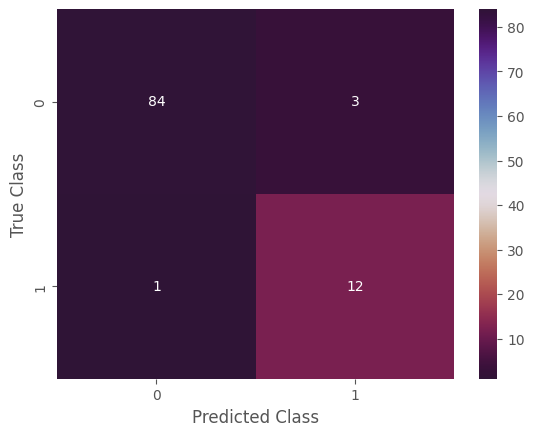

In [30]:
display_cmf(binary_reg.predict(X_val),y_val)

In [32]:
project_name = "AML Project 2"
wandb.init(project_name)

## PLEASE DON'T RUN THE CELLS BELOW, THESE REQUIRE WANDB API CODE. PLEASE VIEW THE REPORT [HERE](https://api.wandb.ai/links/rf_project/w918frdy)

In [1]:
#https://wandb.ai/rf_project/AML%20Project%202/sweeps/9yr22vff?workspace=user-athe_kunal
C_list = [0.1,1.0,10.0,100.0]

class_weight_list = [2,4,6,8,10]

sweep_config = {
    "method":"grid",
    'parameters':{
    "C":{"values":C_list},
    "class_weight_rec":{"values":class_weight_list}}
}

def main():
    run =wandb.init(project_name)

    C = wandb.config.C
    class_weight_rec = wandb.config.class_weight_rec
    binary_reg = LogisticRegression(class_weight={1:class_weight_rec},n_jobs=-1,C=C)
    
    binary_reg.fit(X_train,y_train)

    train_acc = binary_reg.score(X_train,y_train)
    val_acc = binary_reg.score(X_val,y_val)
    val_pred = binary_reg.predict(X_val)
    f1_score_ = f1_score(y_val,val_pred)
    precision_score_ = precision_score(y_val,val_pred)
    recall_score_ = recall_score(y_val,val_pred)
    
    wandb.log({
        "train_acc":train_acc,
        "val_acc":val_acc,
        "val_f1_score":f1_score_,
        "val_precision":precision_score_,
        "val_recall_score":recall_score_
        })

sweep_id = wandb.sweep(sweep=sweep_config, project=project_name)
wandb.agent(sweep_id, function=main)

## OBSERVATIONS FROM THE GRID SEARCH
* As the labels are imbalanced, so we need higher class weights for lower frequency class to improve Recall Score. So for an efficient recall score, we need a high C or inverse regularization parameter and higher class weight for low frequency class. So from it we are building the best binary model
* From the hyperparameter sweep, we can see that as C increases, the regularization effect decreases and the accuracy increases. But it affects the recall score. So higher class weights would improve recall score, and for higher class weights we are getting high recall score.

In [32]:
best_C = 0.1
best_class_weight = 10

best_binary_reg = LogisticRegression(class_weight={1:best_class_weight},n_jobs=-1,C=best_C)
best_binary_reg.fit(X_train,y_train)

val_preds = best_binary_reg.predict(X_val)

In [30]:
display_metric(y_val,val_preds)

Accuracy:  0.84
F1 Score:  0.6190476190476191
Precision:  0.4482758620689655
Recall:  1.0


In [33]:
display_metric(y_test,best_binary_reg.predict(X_test))

Accuracy:  0.86
F1 Score:  0.631578947368421
Precision:  0.48
Recall:  0.9230769230769231


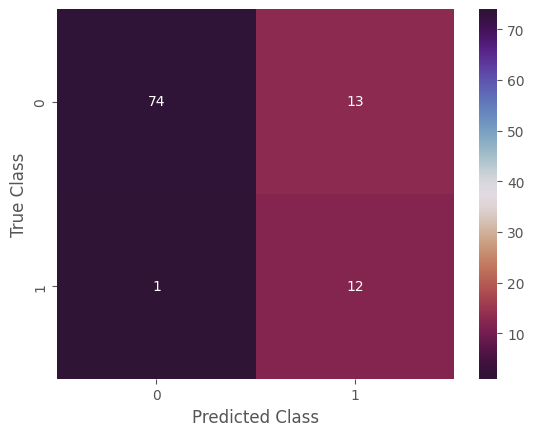

In [36]:
display_cmf(best_binary_reg.predict(X_test),y_test)

## SVM

## PLEASE DON'T RUN THE CELLS BELOW, THESE REQUIRE WANDB API CODE. PLEASE VIEW THE REPORT [HERE](https://api.wandb.ai/links/rf_project/actimdmb)

* We are tuning the kernel, C (inverse regularization), polynomial degree and gamma list

In [1]:
#https://wandb.ai/rf_project/AML%20Project%202/sweeps/o1mm6qj8?workspace=user-athe_kunal
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
C_list  = [0.01,0.1,1.0,10.0]
degree_list = [3,5,7]
gamma_list = ['scale', 'auto']

sweep_config = {
    "method":"grid",
    'parameters':{
    "C":{"values":C_list},
    "gamma":{"values":gamma_list},
    "degree":{"values":degree_list},
    "kernel":{"values":kernel_list},
    }
}

def main():
    run =wandb.init(project_name)

    C = wandb.config.C
    gamma = wandb.config.gamma
    degree = wandb.config.degree
    kernel = wandb.config.kernel

    binary_svc = SVC(kernel=kernel,degree=degree,gamma=gamma,C=C)
    
    binary_svc.fit(X_train,y_train)

    train_acc = binary_svc.score(X_train,y_train)
    val_acc = binary_svc.score(X_val,y_val)
    val_pred = binary_svc.predict(X_val)
    f1_score_ = f1_score(y_val,val_pred)
    precision_score_ = precision_score(y_val,val_pred)
    recall_score_ = recall_score(y_val,val_pred)
    
    wandb.log({
        "train_acc":train_acc,
        "val_acc":val_acc,
        "val_f1_score":f1_score_,
        "val_precision":precision_score_,
        "val_recall_score":recall_score_
        })

sweep_id = wandb.sweep(sweep=sweep_config, project=project_name)
wandb.agent(sweep_id, function=main)

## OBSERVATIONS
* The suggested kernel as per recall score is linear, C value is 1.0 and gamma is scale. SVM does inherent regularization, so we don't need the class weight parameter here. Also, we are passing `probability=True` to use it for soft voting
* We see that rbf kernel gives high accuracy on the train set, lower accuracy on the validation set and low recall on the validation set. Also, polynomial model generates similar results, which means that the linear kernel is sufficient to fit the model, and we don't need to project them into higher dimension, as current features can explain the predictions. 

In [37]:
best_svm_model = SVC(C=1.0,degree=3,kernel='linear',gamma='scale',probability=True)
best_svm_model.fit(X_train,y_train)

svm_val_preds = best_svm_model.predict(X_val)

display_metric(y_val,svm_val_preds)

Accuracy:  0.98
F1 Score:  0.9285714285714286
Precision:  0.8666666666666667
Recall:  1.0


In [40]:
display_metric(y_test,best_svm_model.predict(X_test))

Accuracy:  0.95
F1 Score:  0.8
Precision:  0.8333333333333334
Recall:  0.7692307692307693


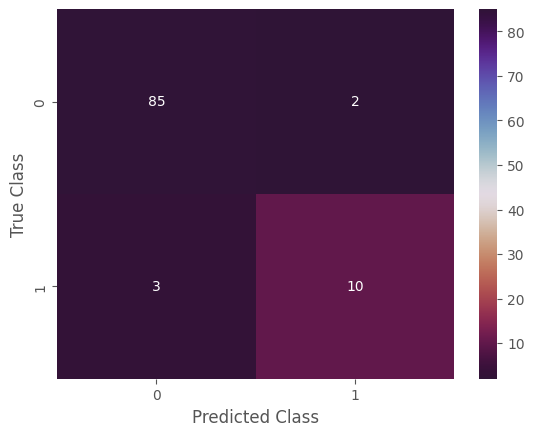

In [41]:
display_cmf(best_svm_model.predict(X_test),y_test)

## RANDOM FORESTS

## PLEASE DON'T RUN THE CELLS BELOW, THESE REQUIRE WANDB API CODE. PLEASE VIEW THE REPORT [HERE](https://wandb.ai/rf_project/AML%20Project%202/reports/GRID-SEARCH-OF-RANDOM-FOREST-CLASSIFIER--VmlldzozNjk2NTM5).

In [33]:
# https://wandb.ai/rf_project/AML%20Project%202/sweeps/o9myww1y?workspace=user-athe_kunal
param_grid = {
	'n_estimators': [ 10,20,40,60,80,100],
	'max_depth': [3,10,20],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [3, 6, 9],
}

sweep_config = {
    "method":"grid",
    'parameters':{
    "n_estimators":{"values":param_grid['n_estimators']},
    "max_depth":{"values":param_grid['max_depth']},
    "max_features":{"values":param_grid['max_features']},
    "max_leaf_nodes":{"values":param_grid['max_leaf_nodes']},
    }
}

def main():
    run =wandb.init(project_name)

    n_estimators = wandb.config.n_estimators
    max_depth = wandb.config.max_depth
    max_features = wandb.config.max_features
    max_leaf_nodes = wandb.config.max_leaf_nodes

    binary_rf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                random_state=42,n_jobs=-1,verbose=1,
                                max_features=max_features,max_leaf_nodes=max_leaf_nodes)
    
    binary_rf.fit(X_train,y_train)

    train_acc = binary_rf.score(X_train,y_train)
    val_acc = binary_rf.score(X_val,y_val)
    val_pred = binary_rf.predict(X_val)
    f1_score_ = f1_score(y_val,val_pred)
    precision_score_ = precision_score(y_val,val_pred)
    recall_score_ = recall_score(y_val,val_pred)
    
    wandb.log({
        "train_acc":train_acc,
        "val_acc":val_acc,
        "val_f1_score":f1_score_,
        "val_precision":precision_score_,
        "val_recall_score":recall_score_
        })

sweep_id = wandb.sweep(sweep=sweep_config, project=project_name)
wandb.agent(sweep_id, function=main)

## OBSERVATIONS

As per the Recall score:

* Max depth: We have a max depth of 3, which means that we don't need to high depth trees and the gini impurity in the upper layers is sufficient to express decision trees.
* We need number of estimators as 100, so as to reduce variance as we combine the predictions from these estimators to get final predictions.
* Max features is None, which means that each estimator needs to consider all the features while building the decision tree. *This aligns with the economic sense, as someone needs to consider all the macro economic features to decide whether we will have recession or not*. 

In [38]:
best_rf_model = RandomForestClassifier(
    n_estimators=100,max_depth=3,max_leaf_nodes=6,max_features=None
)

best_rf_model.fit(X_train,y_train)

rf_val_preds = best_rf_model.predict(X_val)

display_metric(y_val,rf_val_preds)

Accuracy:  0.98
F1 Score:  0.9166666666666666
Precision:  1.0
Recall:  0.8461538461538461


## TEST SET SCORES 

In [39]:
display_metric(y_test,best_rf_model.predict(X_test))

Accuracy:  0.96
F1 Score:  0.8181818181818181
Precision:  1.0
Recall:  0.6923076923076923


## RANDOM FOREST FEATURE IMPORTANCE

CLAIMSx feature has the highest importance
DPCERA3M086SBEA feature has the lowest importance


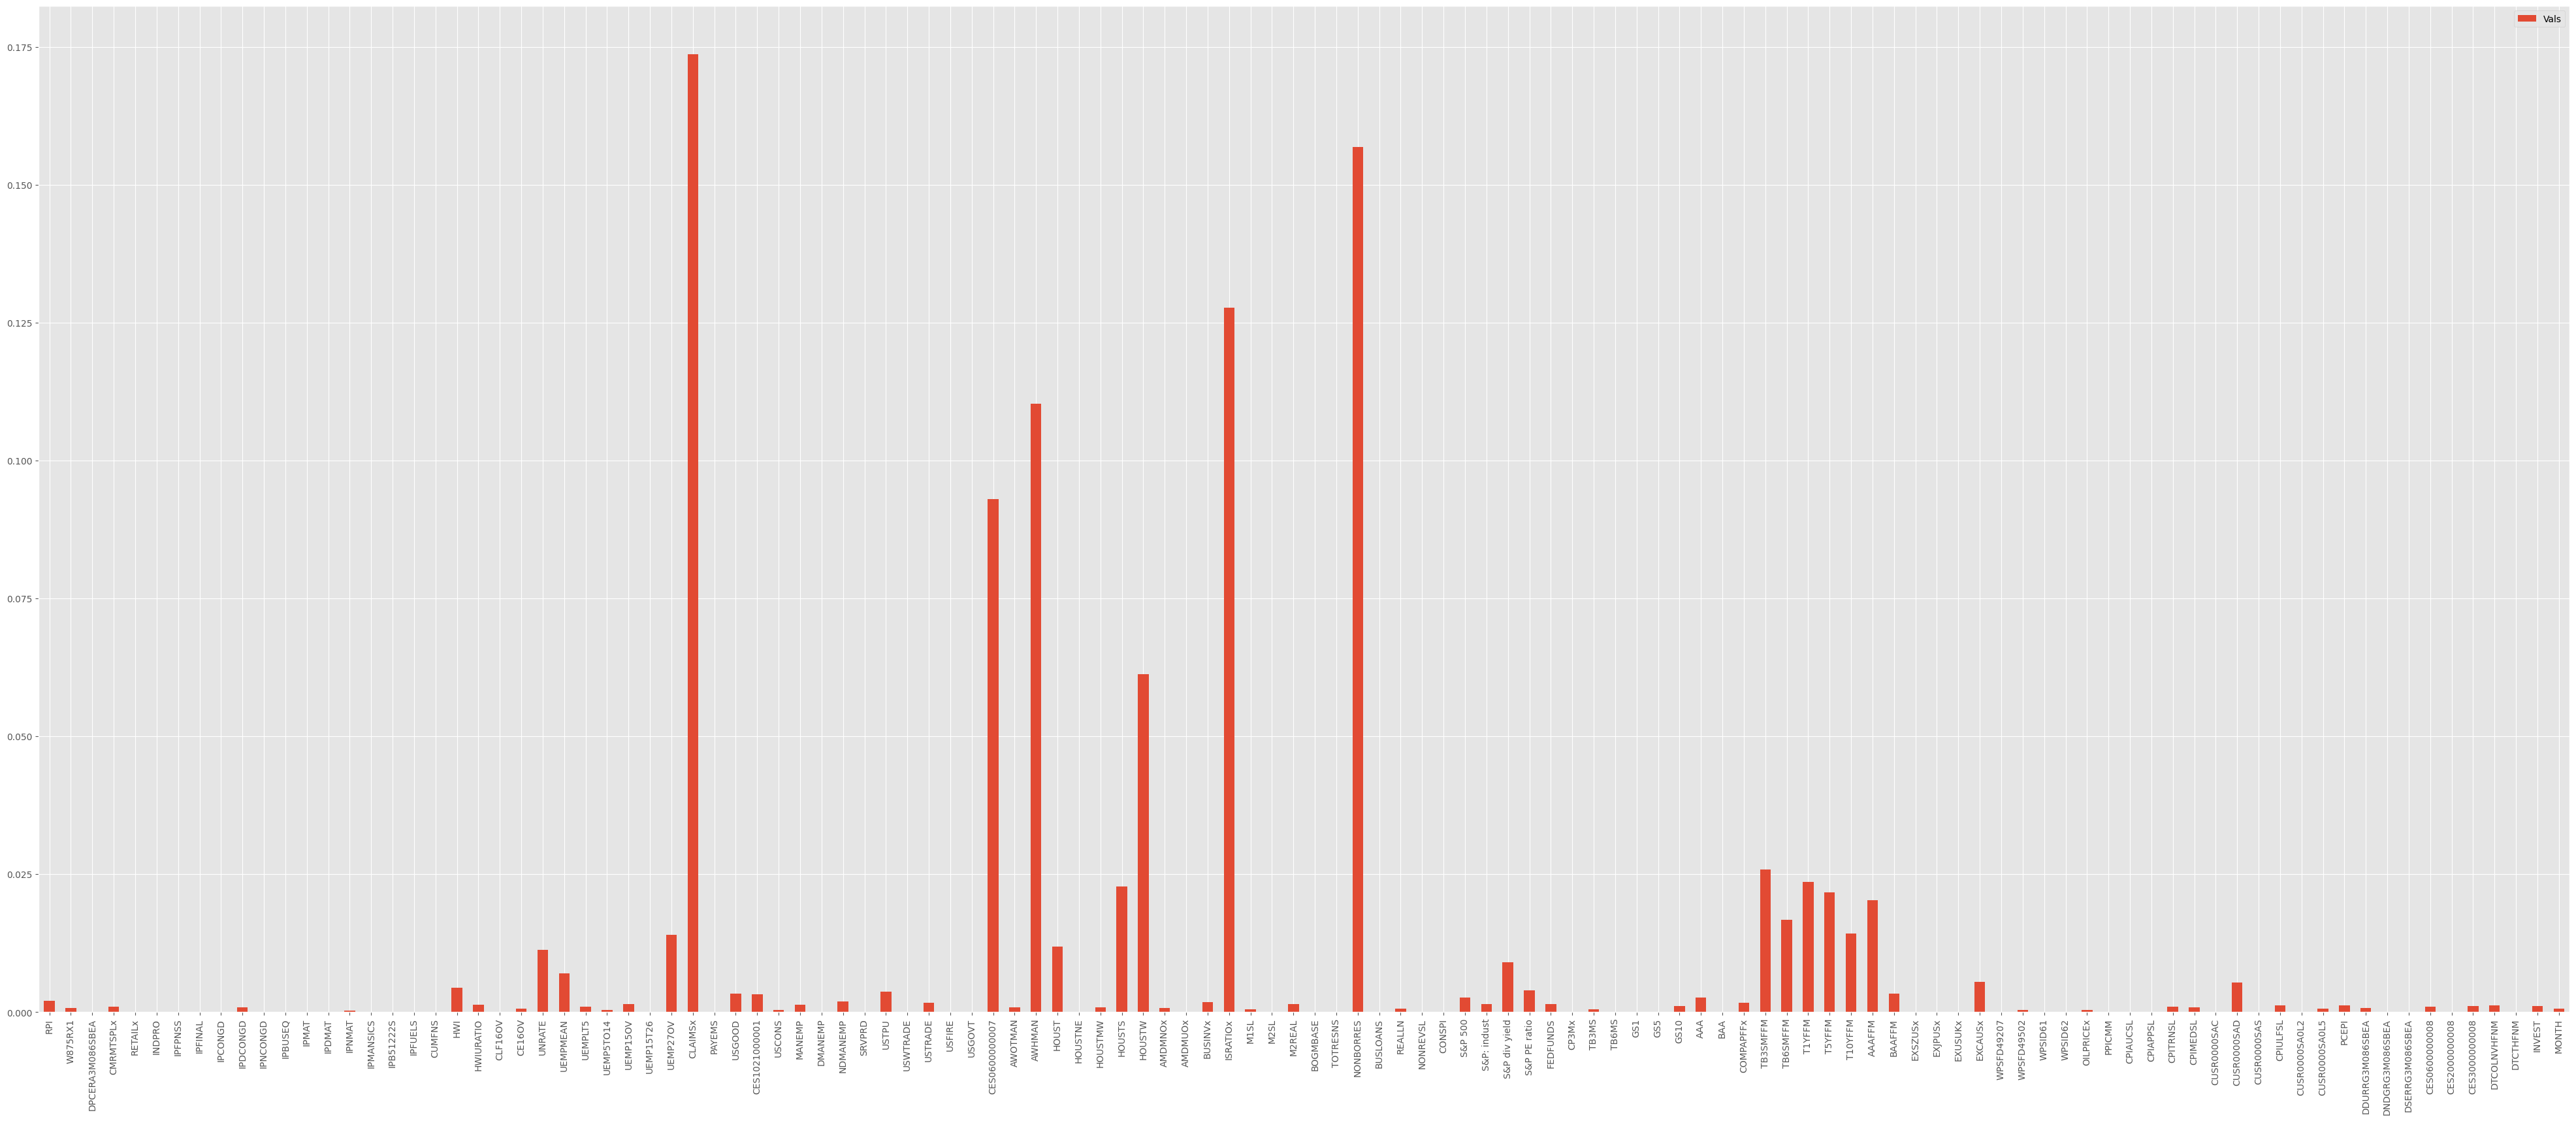

In [58]:
import numpy as np
rf_fi = best_rf_model.feature_importances_
rf_fi_df = pd.DataFrame(columns=['Vals'])
rf_fi_df['Vals'] = rf_fi
rf_fi_df.index = X_train.columns
rf_fi_df.plot.bar(figsize=(50,20))

best_argmax = np.argmax(rf_fi)
worst_argmax = np.argmin(rf_fi)
cols = X_train.columns
print(f"{cols[best_argmax]} feature has the highest importance")
print(f"{cols[worst_argmax]} feature has the lowest importance")
# plt.figure()

* The feature importance for CLAIMSX is the highest. It is the jobless claims by unemployed people, and if more people claim for for unemployment benefits, then there is a signal for economy
* DPCERA3M086SBEA means the personal consumption index for food and beverages which does not play more importance determining if we are in recession or not  

## ENSEMBLE LEARNING WITH VOTING CLASSIFIERS

## HARD VOTING

In [30]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("logistic",best_binary_reg),
    ("svm",best_svm_model),
    ('rf',best_rf_model)
]

hard_vote = VotingClassifier(estimators=estimators,n_jobs=-1)

In [31]:
hard_vote.fit(X_train,y_train)
hard_vote_preds = hard_vote.predict(X_val)
hard_vote_preds_test = hard_vote.predict(X_test)

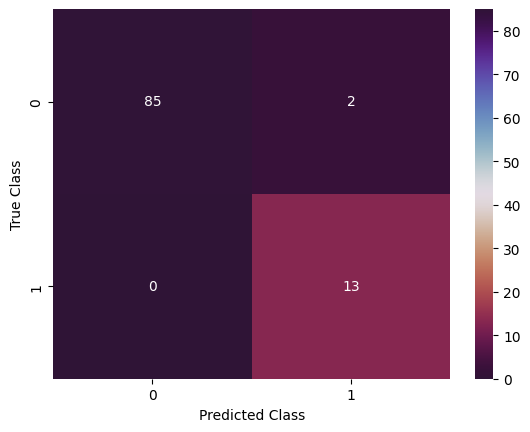

Accuracy:  0.98
F1 Score:  0.9285714285714286
Precision:  0.8666666666666667
Recall:  1.0


In [35]:
display_cmf(hard_vote_preds,y_val)
display_metric(y_val,hard_vote_preds)

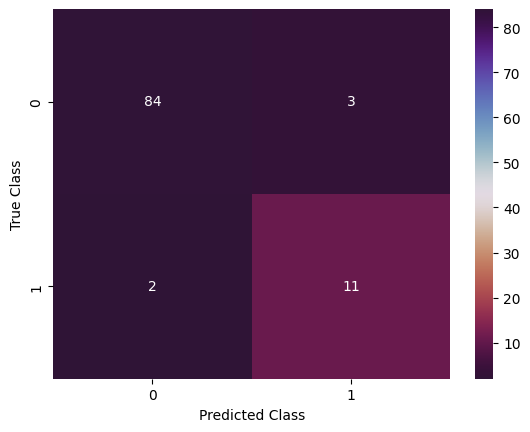

Accuracy:  0.95
F1 Score:  0.8148148148148148
Precision:  0.7857142857142857
Recall:  0.8461538461538461


In [36]:
display_cmf(hard_vote_preds_test,y_test)
display_metric(y_test,hard_vote_preds_test)

## SOFT VOTE

In [37]:
soft_vote = VotingClassifier(estimators=estimators,voting="soft")

soft_vote.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=0.1, class_weight={1: 10},
                                                 n_jobs=-1)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=6))],
                 voting='soft')

In [38]:
soft_vote_preds = soft_vote.predict(X_val)
soft_vote_preds_test = soft_vote.predict(X_test)

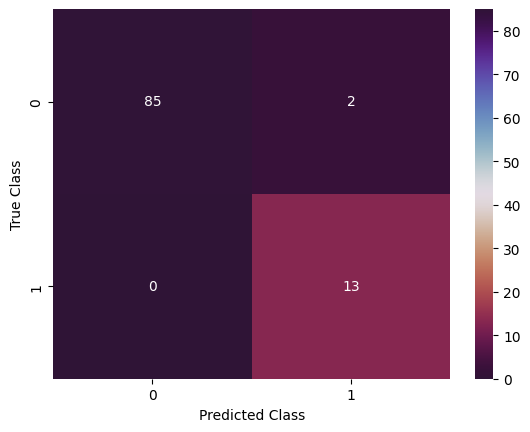

Accuracy:  0.98
F1 Score:  0.9285714285714286
Precision:  0.8666666666666667
Recall:  1.0


In [39]:
display_cmf(hard_vote_preds,y_val)
display_metric(y_val,hard_vote_preds)

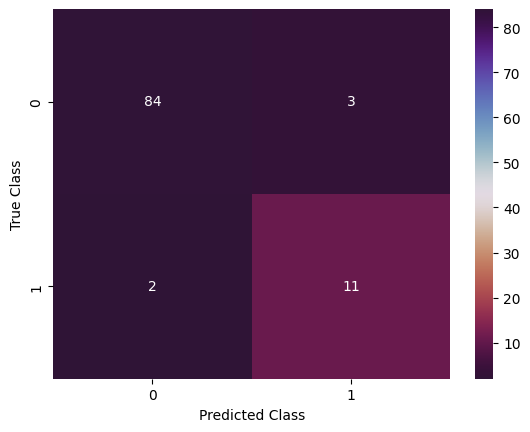

Accuracy:  0.95
F1 Score:  0.8148148148148148
Precision:  0.7857142857142857
Recall:  0.8461538461538461


In [40]:
display_cmf(hard_vote_preds_test,y_test)
display_metric(y_test,hard_vote_preds_test)

## THE HARD VOTING AND SOFT VOTING GAVE SAME PERFORMANCE FOR BOTH THE TEST SET

## COMPARISON TABLE

| Model           | Val Recall Score  | Test Recall Score |
| ----------------|---------------------|----------------------|
| Logistic Model  | 1.0                 |0.924                 |
| SVM Model       | 1.0                 |0.772                 |
| RF Model        | 1.0                 |0.687                 |
| Hard Voting     | 1.0                 |0.846                 |
| Soft Voting     | 1.0                 |0.846                 |

* So our Logistic Regression performed the best as per recall on the test set score, which signifies the low complexity of the dataset. As we got lower value for complex model. So Logistic Model tends to perform well for the dataset with class weights. Also, we did not use class weights for other models, **hence we are getting less performance for other models**. This highlights the importance of class weights in imbalanced dataset.  